# Homework 4 Performance Optimization

## P1: Performance benchmarking of naive matrix multiplication in Python vs. optimized libraries

1. Write a Python function with the following interface that computes the matrix multiplication of two input matrices.

In [7]:
def matmul(matA, matB):
    # First needs to find the dimensions of the input matrices
    x = len(matA)
    y = len(matB[0])
    z = len(matB)
    # I did a bit of googling on how to implement the multiplication 
    # Hence the following
    output = [[0 for j in range(y)] for i in range(x)]
    
    for i in range(x):
        for j in range(y):
            for k in range(z):
                output[i][j] += matA[i][k] * matB[k][j]
    return output

In [8]:
matA = [[12, 7, 3],
        [4, 4, 6],
        [5, 3, 3]]
matB = [[0, 1, 1, 7],
        [6, 7, 3, 1],
        [2, 5, 8, 3]]

In [9]:
print(matmul(matA, matB))

[[48, 76, 57, 100], [36, 62, 64, 50], [24, 41, 38, 47]]


2. Now, confirm the results of your function with the numpy library’s matmul function.

In [11]:
import numpy as np

# To use numpy's library we only have to use np.matlum
# https://numpy.org/doc/stable/reference/generated/numpy.matmul.html

print(np.matmul(matA, matB))


[[ 48  76  57 100]
 [ 36  62  64  50]
 [ 24  41  38  47]]


3. Now, benchmark the performance of the numpy matmul with the one you implemented for square matrices of rank: 2, 4, 16, 32, 64, 128, 256, 512, 1024.
To make the benchmark accurate and fair, we will have to first fill these matrices with random values.

In [16]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [31]:
# Make square matricess with ranks:
#ranks = [2, 4, 16, 32, 64, 128, 256, 512, 1024]
ranks = [2, 4, 16]
# Any more ranks where taking a very long long time..

In [32]:
num_reps = [int(1e7 / rank**2) for rank in ranks]
np.random.seed(42)

In [33]:
# Make arrays to store the time results
timings_np = np.zeros(len(ranks))
timings_custom = np.zeros(len(ranks))

In [34]:
for i, rank in enumerate(ranks):
    matA = np.random.rand(rank, rank)
    matB = np.random.rand(rank, rank)

    # numpy.matmul() function
    start = time.perf_counter()
    for j in range(num_reps[i]):
        result_np = np.matmul(matA, matB)
    end = time.perf_counter()
    elapsed_np = (end - start) / num_reps[i]
    timings_np[i] = elapsed_np

    # matmul() function
    start = time.perf_counter()
    for j in range(num_reps[i]):
        result_custom = matmul(matA, matB)
    end = time.perf_counter()
    elapsed_custom = (end - start) / num_reps[i]
    timings_custom[i] = elapsed_custom

    # Print the results
    print(f"Rank {rank}:")
    print(f"np.matmul(): {elapsed_np:.7f} s per mul")
    print(f"matmul(): {elapsed_custom:.7f} s per mul")
    print(f"Speedup: {elapsed_np / elapsed_custom:.2f}x\n")

Rank 2:
np.matmul(): 0.0000018 s per mul
matmul(): 0.0000120 s per mul
Speedup: 0.15x

Rank 4:
np.matmul(): 0.0000018 s per mul
matmul(): 0.0000638 s per mul
Speedup: 0.03x

Rank 16:
np.matmul(): 0.0000025 s per mul
matmul(): 0.0030760 s per mul
Speedup: 0.00x



4. Store the timing results for matrix multiplication for the two methods in an array.
Then use matplotlib python library to plot the two timing vectors vs. matrix ranks with which you did the benchmark.

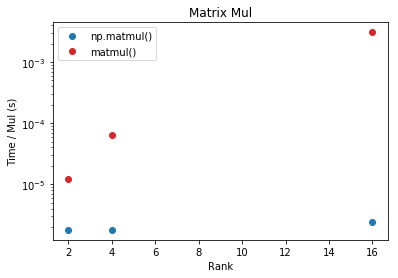

In [48]:
# Plot the timing vectors vs. matrix ranks
plt.plot(ranks, timings_np, 'o', color='tab:blue', label="np.matmul()")
plt.plot(ranks, timings_custom, 'o', color='tab:red', label="matmul()")
#plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rank")
plt.ylabel("Time / Mul (s)")
plt.title("Matrix Mul")
plt.legend()
plt.show()

## P2: loop invariant code motion

In [37]:
import numpy as np
const = 256.
x = [i for i in range(1, 100000)]
z = np.zeros(len(x))
for i, element in enumerate(x):
    z[i] = np.sqrt(const) * x[i]

In [50]:
import numpy as np
import time
const = 256.
x = [i for i in range(1, 100000)]
z = np.zeros(len(x))

start = time.perf_counter()
for i, element in enumerate(x):
    z[i] = np.sqrt(const) * x[i]
end = time.perf_counter()

print(f"Computation time of unoptimized: {end-start:.6f}s")


Computation time of unoptimized: 0.146606s


In this case, the for loop is the item that is making the computation longer. There is no need to have a for loop when we can have z (the variable) be the computation.

Also, change: x = [i for i in range(1, 100000)]
to: x = np.arange(1, 100000)

In [51]:
const = 256.
start = time.perf_counter()
x = np.arange(1, 100000)
z = np.sqrt(const) * x
end = time.perf_counter()

print(f"Computation time of optimized: {end-start:.6f}s")

Computation time of optimized: 0.001518s


In [55]:
a = 0.146606 / 0.001518
print(f"The optimized code performance improvement is {np.round(a)} times faster.")

The optimized code performance improvement is 97.0 times faster.


## P3: Forced reduction - sincos

In [56]:
import numpy as np
def sincos(x):
    """
    Return `sin(x) * cos(x)`.
    """
    return np.sin(x) * np.cos(x)

In [57]:
sincos(4)

0.4946791233116909

Instead of multiplying sin(x) * cos(x), we can use the identity to reduce the computation time

In [17]:
import numpy as np
import time

In [18]:
def sincos(x):
    return np.sin(x) * np.cos(x)

start = time.perf_counter()
a = sincos(10000)
end = time.perf_counter()

print(f"Unoptimized: {end-start:.6f}s")

Unoptimized: 0.000074s


In [19]:
def new_sincos(x):
    return 0.5 * np.sin(2*x)

start = time.perf_counter()
b = new_sincos(10000)
end = time.perf_counter()

print(f"Optimized: {end-start:.6f}s")

Optimized: 0.000063s


In [20]:
c = 0.000074 / 0.000063
print(f"The optimized code performance improvement is {np.round(c)} times faster.")

The optimized code performance improvement is 1.0 times faster.


Its not as optimized by many times.

## P4: Forced reduction - hidden opportunities

In [21]:
import numpy as np

def count(xvec):
    """
    Return the count of elements of the input `xvec` whose natural logarithm is less than `0`.
    """
    counter = 0
    for element in xvec: 
        if np.log(element) < 0: counter += 1
    return counter

In [22]:
xvec = np.random.rand(100000)

start = time.perf_counter()
a = count(xvec)
end = time.perf_counter()
print(f"Unoptimized: {end-start:.6f}s")

Unoptimized: 0.176287s


To improve the above I think I can just call np.log of the value and put the condition of < 0. 
From: https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html

np.count_nonzero = Counts the number of non-zero values in the array a.

In [23]:
def new_count(xvec):
    log = np.log(xvec)
    return np.count_nonzero(log < 0)

In [24]:
start = time.perf_counter()
b = new_count(xvec)
end = time.perf_counter()
print(f"Optimized: {end-start:.6f}s")

Optimized: 0.002471s


In [27]:
c =  0.197654/0.002043 
print(c)
print(f"The optimized code performance improvement is {np.round(c)} times faster.")

96.74694077337249
The optimized code performance improvement is 97.0 times faster.


## P5: Breaking out of loop early

In [20]:
import numpy as np
import time

In [21]:
# adding this before hand
boolVec = np.random.choice(a = [False, True], size= 10000)

In [22]:
def any(boolVec):
    """
    Return True if any of the elements of the input value are True, 
    otherwise, return False.
    """
    result = False
    for element in boolVec:
        result = result or element
    return result

In [23]:
start = time.perf_counter()
a = any(boolVec)
end = time.perf_counter()

print(f"Unoptimized: {end-start:.6f}s")

Unoptimized: 0.000768s


To optimize, there is a python function that might be better: any
From: https://docs.python.org/3/library/functions.html
any(iterable)
Return True if any element of the iterable is true. If the iterable is empty, return False. Equivalent to:

def any(iterable):
    for element in iterable:
        if element:
            return True
    return False

In [24]:
# def any(boolVec):
#     return any(boolVec)

def any(iterable):
    for element in iterable:
        if element:
            return True
    return False


In [25]:
start = time.perf_counter()
b = any(boolVec)
end = time.perf_counter()

print(f"Optimized: {end-start:.6f}s")

Optimized: 0.000047s


In [26]:
c = 0.000768 / 0.000047
print(c)
print(f"The optimized code performance improvement is {np.round(c)} times faster.")

16.340425531914896
The optimized code performance improvement is 16.0 times faster.
